In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [83]:
import numpy as np
import eeghdf
import h5py
import sys
sys.path.append("./eeg-hdfstorage/notebooks/")
import stacklineplot
import torch

In [34]:
filename = "./eeg-hdfstorage/data/absence_epilepsy.eeghdf"

In [35]:
def load_eeg_file_h5py(filename):
	hdf = h5py.File(filename, "r")
	atributes = hdf["patient"].attrs
	rec = hdf["record-0"]
	signals = rec["signals"]
	return signals

In [36]:
def load_eeg_file_eeghdf(filename):
    file = eeghdf.Eeghdf(filename)
    return file.phys_signals
    

In [12]:
a = load_eeg_file_h5py(filename)[:, 10000:10000 + 1004]
b = load_eeg_file_eeghdf(filename)[:, 10000:10000 + 1004]

self._phys_offset: [-0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003 -0.00176003
 -0.00176003 -0.00176003 -0.00176003  0.03589933  0.03589933  0.5       ]


In [13]:
print(a.shape)
print(b.shape)

(36, 1004)
(36, 1004)


In [14]:
num_channels = 10

In [15]:
labels = [str(i) for i in range(a.shape[0])]

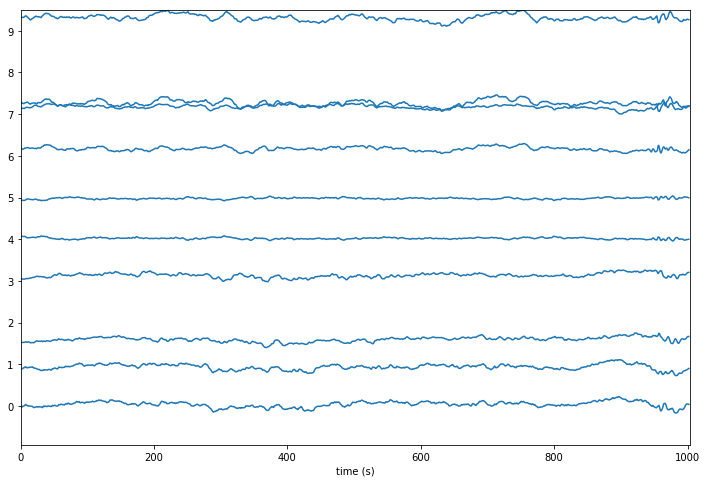

In [16]:
stacklineplot.stackplot(a[:num_channels], ylabels=labels[:num_channels], yscale=1)

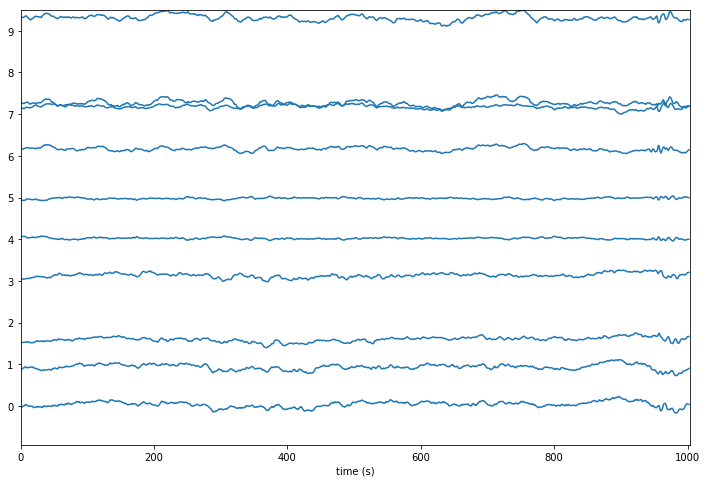

In [17]:
stacklineplot.stackplot(b[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [18]:
def save_EEG(data,num_channels, frequency, filename, channel_names=None):
	if data.shape[1] < 10000:
		np.save(filename, data[0, :, :])
	else:
		np.save(filename, data[0, :10000, :])

In [19]:
c = np.tile(a, 64).reshape(64, 36, 1004)

In [20]:
save_EEG(c, None,None, "test_save")

In [21]:
loader_test_filename = "save_dataloader.npy"

In [25]:
test_2 = np.load(loader_test_filename).T

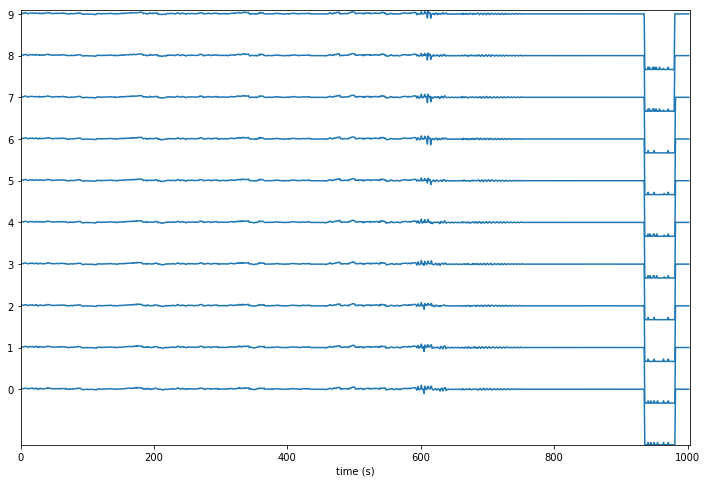

In [26]:
stacklineplot.stackplot(test_2[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [24]:
before_stagger_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/sginals_dataloader.npy"
after_stagger_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/sginals_stag_dataloader.npy"

In [29]:
before_stagger = np.load(before_stagger_filename)
after_stagger = np.load(after_stagger_filename)

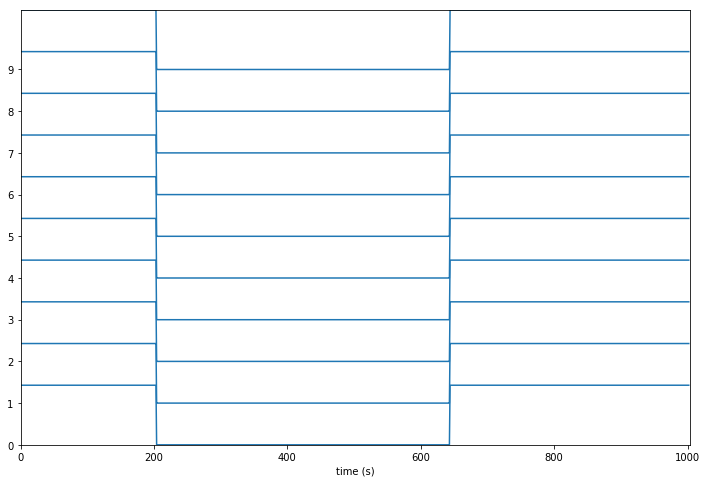

In [30]:
stacklineplot.stackplot(before_stagger[:num_channels], ylabels=labels[:num_channels], yscale=1)

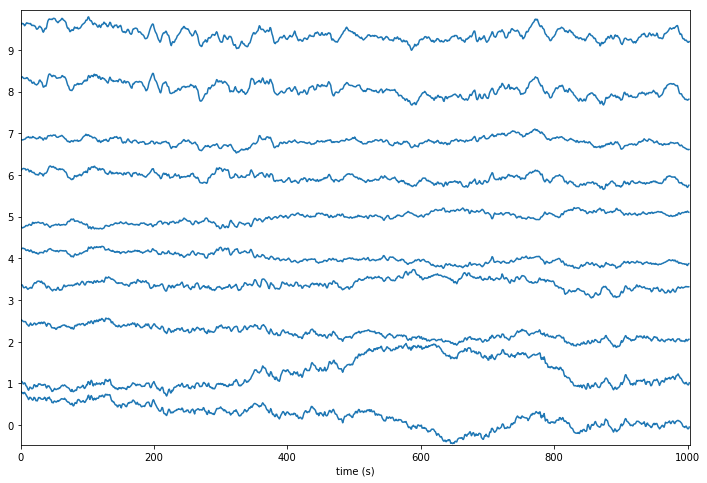

In [31]:
stacklineplot.stackplot(after_stagger[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [73]:
after_load_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/ddl_after_load.npy"

In [74]:
after_load = np.load(after_load_filename)

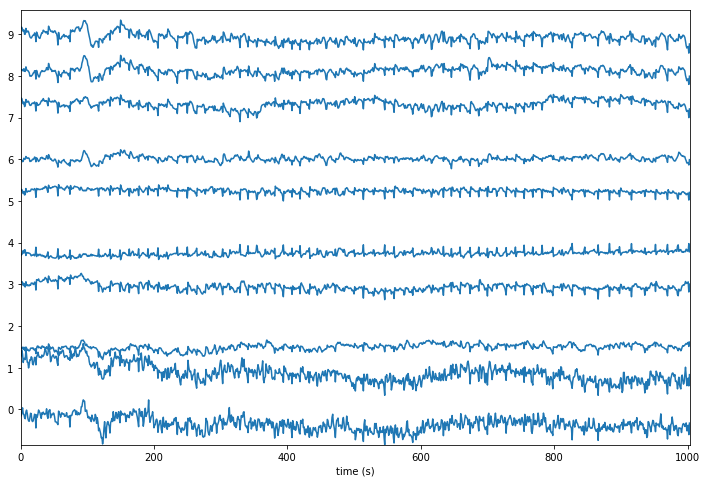

In [75]:
stacklineplot.stackplot(after_load[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [122]:
after_get_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/save_dataloader.npy"

In [127]:
after_get = np.load(after_get_filename)

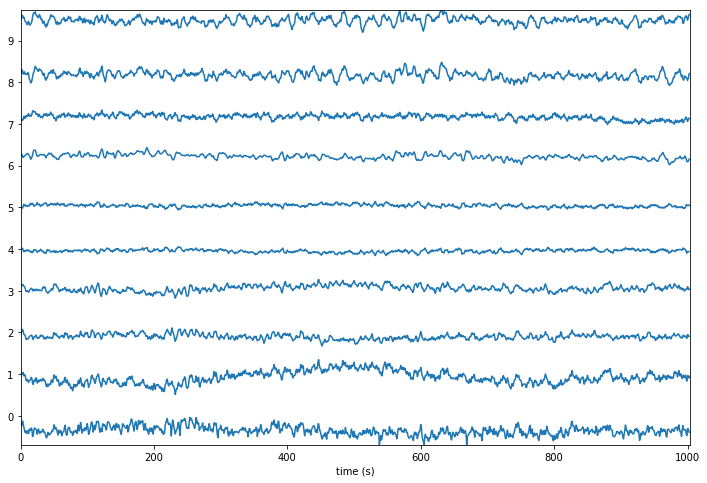

In [128]:
stacklineplot.stackplot(after_get[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [119]:
final_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/ddl_final.npy"

In [120]:
final_get = np.load(final_filename).T

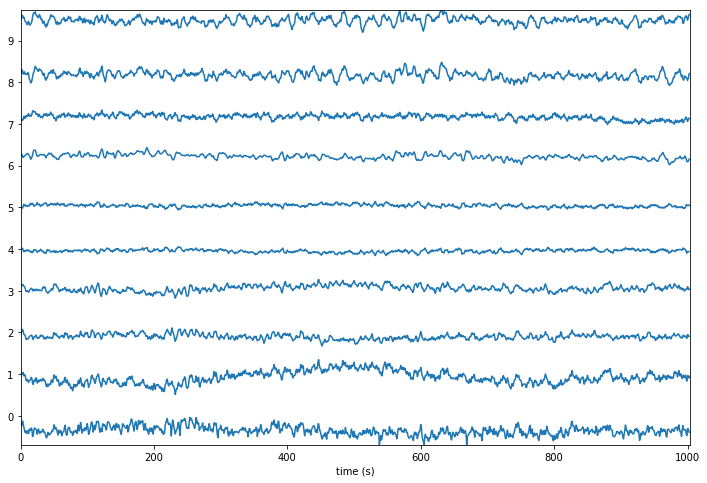

In [121]:
stacklineplot.stackplot(final_get[:num_channels], ylabels=labels[:num_channels], yscale=1)

In [81]:
x =after_load 

In [91]:
sample = torch.from_numpy(x)
sample = sample.view(sample.shape[1], sample.shape[0]).type('torch.FloatTensor')

In [105]:
x.reshape(x.shape[1], x.shape[0])

array([[ -89, -125,  -30, ..., -172,  -33,  -19],
       [  -5, -161,  -91, ..., -105,  -96,  -61],
       [-101,  -84,  -68, ..., -343, -255, -236],
       ..., 
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int16)

In [113]:
x.shape

(44, 1004)

In [115]:
np.sum(((x.reshape(x.shape[1], x.shape[0])) - x.T))

-13369344

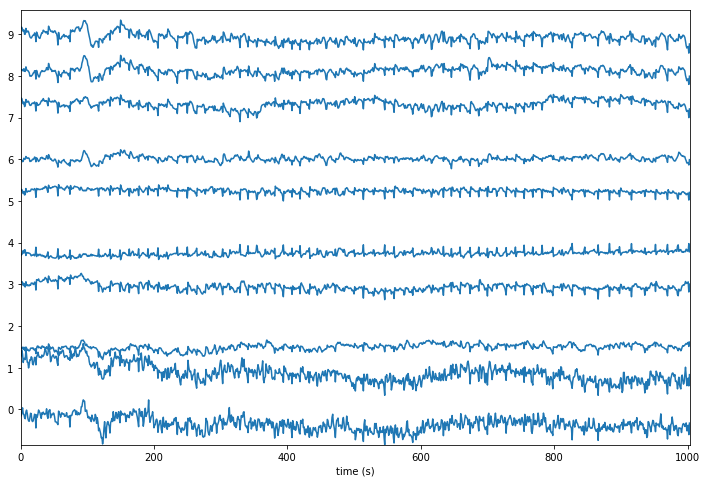

In [108]:
stacklineplot.stackplot(sample.numpy().reshape(x.shape[0], x.shape[1])[:num_channels], ylabels=labels[:num_channels], yscale=1)

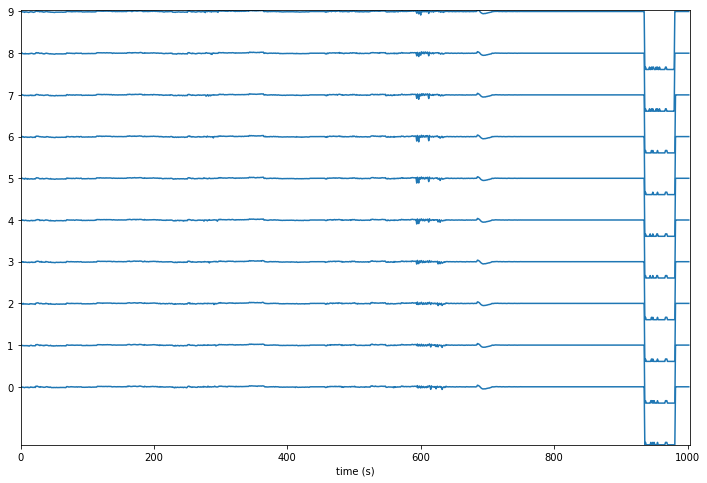

In [109]:
stacklineplot.stackplot(sample.numpy().T[:num_channels], ylabels=labels[:num_channels], yscale=1)